<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/10week/RNN_LSTM_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
# df = pd.read_csv('/content/drive/MyDrive/3-2/MLprogramming/10week/TSLA.csv')
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [66]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [67]:
df = df[['Open', 'High', 'Low', 'Close']]

In [68]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
data = scaled

In [69]:
# 3. 시퀀스 생성
window = 3 #3일치
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window, :4])
    y.append(data[i+window, 3])
X, y = np.array(X), np.array(y)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [71]:

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=False, input_shape=(window, 4)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=["mae"])
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0084 - mae: 0.0357
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2191e-04 - mae: 0.0093
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6117e-04 - mae: 0.0074
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1091e-04 - mae: 0.0065
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3328e-04 - mae: 0.0074
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3274e-04 - mae: 0.0125
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0561e-04 - mae: 0.0062
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8773e-04 - mae: 0.0058
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7296e-04 - mae: 0.0067
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3847e-04 - mae: 0.0052
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7479e-04 - mae: 0.0066
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2497e-04 - mae

In [72]:
# 5. 예측
pred = model.predict(X_test)

# 예측 결과를 원래 스케일로 복원
scaled_close = scaled[:, 3].reshape(-1, 1)  # 종가만
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]

y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))
pred_inv = close_scaler.inverse_transform(pred)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [73]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test mse: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test mse: 0.0001
Test MAE: 0.0058


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test_inv, pred_inv)
mae = mean_absolute_error(y_test_inv, pred_inv)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
#정규화를 풀고 나온 값이라 훨신 크게 나오는 모습

MSE: 117.7660
MAE: 7.1462


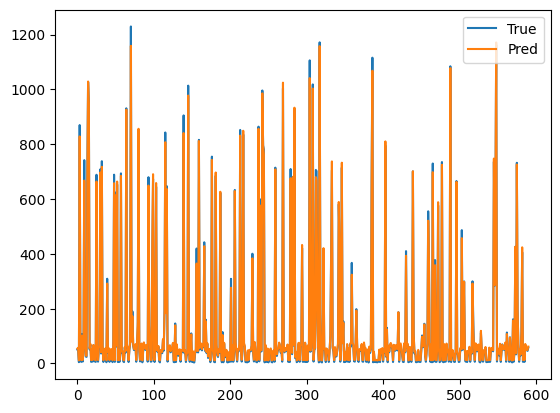

In [75]:
plt.plot(y_test_inv, label='True')
plt.plot(pred_inv, label='Pred')
plt.legend(); plt.show()

---

---

---

In [76]:

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=False, input_shape=(window, 4)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=["mae"])
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0080 - mae: 0.0364
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1742e-04 - mae: 0.0081
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2756e-04 - mae: 0.0072
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3253e-04 - mae: 0.0081
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7507e-04 - mae: 0.0065
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1399e-04 - mae: 0.0068
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7737e-04 - mae: 0.0067
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0453e-04 - mae: 0.0074
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9509e-04 - mae: 0.0091
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4686e-04 - mae: 0.0079
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7552e-04 - mae: 0.0061
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8880e-04 - mae:

In [77]:
# 5. 예측
pred = model.predict(X_test)

# 예측 결과를 원래 스케일로 복원
scaled_close = scaled[:, 3].reshape(-1, 1)  # 종가만
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]

y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))
pred_inv = close_scaler.inverse_transform(pred)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


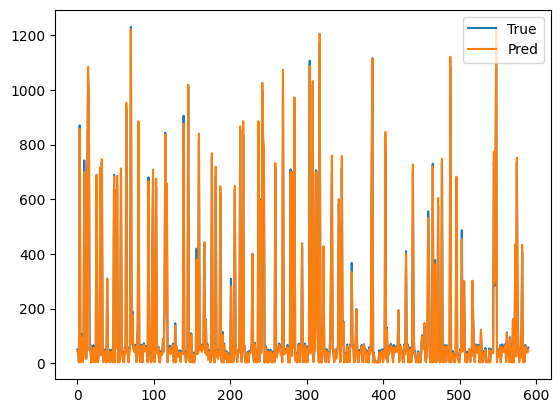

In [78]:
plt.plot(y_test_inv, label='True')
plt.plot(pred_inv, label='Pred')
plt.legend(); plt.show()

In [79]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test mse: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test mse: 0.0001
Test MAE: 0.0060


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test_inv, pred_inv)
mae = mean_absolute_error(y_test_inv, pred_inv)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
#정규화를 풀고 나온 값이라 훨신 크게 나오는 모습

MSE: 130.3482
MAE: 7.4210
